<center>
    <img src="https://gitlab.com/ibm/skills-network/courses/placeholder101/-/raw/master/labs/module%201/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>


# **Hands-on Lab : Web Scraping**


Estimated time needed: **30 to 45** minutes


## Objectives


In this lab you will perform the following:


-   Extract information from a given web site 
-   Write the scraped data into a csv file.


## Extract information from the given web site

You will extract the data from the below web site: <br> 


In [26]:
#this url contains the data you need to scrape
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html"

The data you need to scrape is the **name of the programming language** and **average annual salary**.<br> It is a good idea to open the url in your web broswer and study the contents of the web page before you start to scrape.


Import the required libraries


In [27]:
# Your code here
from bs4 import BeautifulSoup # this module helps in web scrapping.
import requests  # this module helps us to download a web page
import pandas as pd
import numpy as np

Download the webpage at the url


In [28]:
#your code goes here
# get the contents of the webpage in text format and store in a variable called data
data  = requests.get(url).text

Create a soup object


In [29]:
#your code goes here
soup = BeautifulSoup(data,"html5lib")  # create a soup object using the variable 'data'

Scrape the `Language name` and `annual average salary`.


In [30]:
#your code goes here
#find a html table in the web page
table = soup.find('table') # in html table is represented by the tag <table>

Save the scrapped data into a file named _popular-languages.csv_


In [61]:
# Get all rows from the table
language_list = []
for row in table.find_all('tr'): # in html table row is represented by the tag <tr>
    # Get all columns in each row.
    cols = row.find_all('td') # in html a column is represented by the tag <td>
    language = cols[1].getText() # store the value in column 3 as language_name
    salary = cols[3].getText() # store the value in column 4 as annual_average_salary
    language_list.append([language,salary])

# convert to dataframe:
df_lang = pd.DataFrame(language_list, columns=['Language','Average Annual Salary']) 

# save as csv:
filename = "popular-languages.csv"
df_lang.to_csv(filename)

# now print out the file:
df = pd.read_csv(filename, header=1) 
df

,0,Language,Average Annual Salary
0,1,Python,"$114,383"
1,2,Java,"$101,013"
2,3,R,"$92,037"
3,4,Javascript,"$110,981"
4,5,Swift,"$130,801"
5,6,C++,"$113,865"
6,7,C#,"$88,726"
7,8,PHP,"$84,727"
8,9,SQL,"$84,793"
9,10,Go,"$94,082"


In [74]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.2.2


In [79]:
#step 1 - clean data
df['Average Annual Salary'].replace('[\$,]', '', regex=True, inplace=True)
df['Average Annual Salary'] = df['Average Annual Salary'].astype(float)
df.sort_values('Average Annual Salary', ascending=True, inplace=True)
#del df['0']
df = df.set_index('Language')
df


,Average Annual Salary
Language,
PHP,84727.0
SQL,84793.0
C#,88726.0
R,92037.0
Go,94082.0
Java,101013.0
Javascript,110981.0
C++,113865.0
Python,114383.0


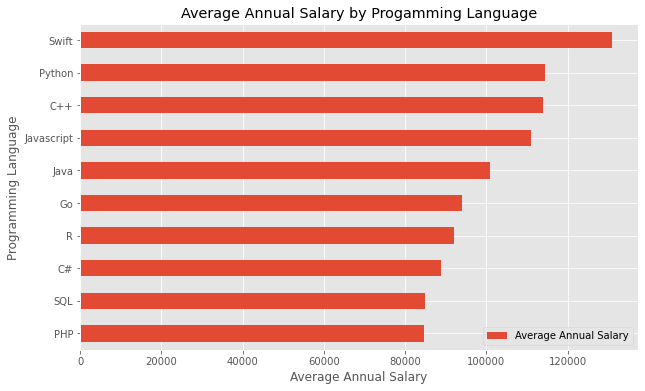

In [80]:
# step 2: plot data
df.plot(kind='barh', figsize=(10, 6))

plt.xlabel('Average Annual Salary') # add to x-label to the plot
plt.ylabel('Programming Language') # add y-label to the plot
plt.title('Average Annual Salary by Progamming Language') # add title to the plot

plt.show()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
